<a href="https://colab.research.google.com/github/act-moises/diplomado/blob/main/Practica_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Librerías extra:
sns.set_style('whitegrid')

#PCA de sklearn
from sklearn.decomposition import PCA

#Analicis de factores de sklearn
from sklearn.decomposition import  FactorAnalysis

SOLICITUD    0
APARIENC     0
HABILIDAD    0
VERACIDAD    0
CONFIANZA    0
LUCIDEZ      0
HONESTID     0
VENTAS       0
EXPERIEN     0
MANEJO       0
AMBICION     0
SOLIDEZ      0
POTENCIA     0
GANA         0
dtype: int64
--------------------------------------------------
SOLICITUD      int64
APARIENC       int64
HABILIDAD      int64
VERACIDAD      int64
CONFIANZA      int64
LUCIDEZ        int64
HONESTID       int64
VENTAS         int64
EXPERIEN       int64
MANEJO         int64
AMBICION       int64
SOLIDEZ        int64
POTENCIA       int64
GANA         float64
dtype: object
--------------------------------------------------


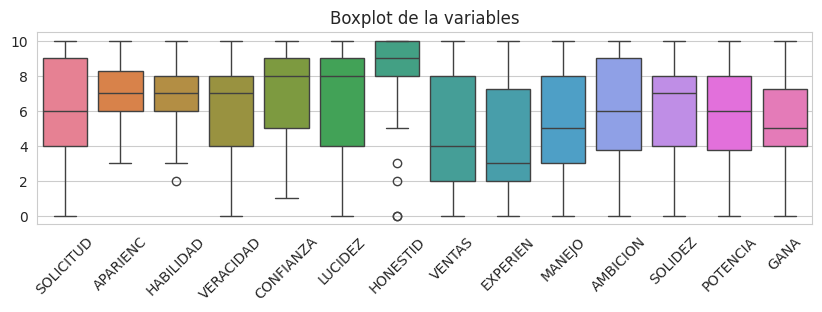

--------------------------------------------------
El dataset tiene 48 filas y 14 columnas
--------------------------------------------------


In [ ]:
#Descarga de data
data = pd.read_csv('Data.csv')

#Contamos na´s
print(data.isna().sum())
print('-'*50)

#Mostramos tipo de cada variable
print(data.dtypes)
print('-'*50)


#Figura y ejes base
fig, ax = plt.subplots(figsize=(10,2.5))

#Grafico de caja de tosas las variables
sns.boxplot(data=data,ax=ax)
#Rotamos xticks
plt.xticks(rotation=45)
#Titulo
plt.title('Boxplot de la variables')
#Mostramos
plt.show()

print('-'*50)

#Tamanio de dataset
print(f'El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas')
print('-'*50)

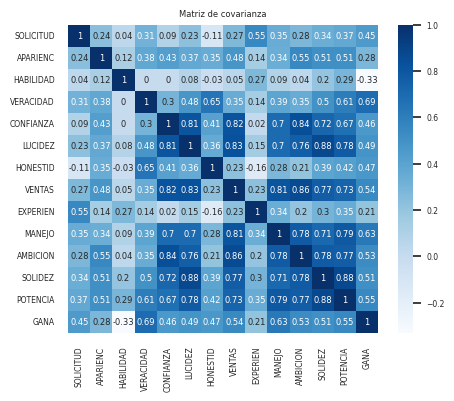

--------------------------------------------------
[7.10402171 1.73656623 1.46087233 1.19961324 0.73721711 0.43852514
 0.36159811 0.27903256 0.0384113  0.07068483 0.08252238 0.12591454
 0.16641372 0.19860678]
4
--------------------------------------------------


,valor_propio,Varianza explicada,Varianza acumulada
SOLICITUD,7.104022,0.553406,0.553406
APARIENC,1.736566,0.128476,0.681881
HABILIDAD,1.460872,0.098079,0.779961
VERACIDAD,1.199613,0.061583,0.841544
CONFIANZA,0.737217,0.034618,0.876162
LUCIDEZ,0.438525,0.030696,0.906858
HONESTID,0.361598,0.025510,0.932368
VENTAS,0.279033,0.017535,0.949903
EXPERIEN,0.038411,0.015869,0.965771
MANEJO,0.070685,0.011399,0.977171


In [ ]:
#Aplicamos PCA
pca = PCA(n_components=14)
pca.fit(data)
pca_data = pca.transform(data)

#Mostramos matriz de transformación (pesos)
#print(pd.DataFrame(pca.components_))

#Calculamos valores propios de matriz de covarianza estandarizada

#Estandarizmos datos
data_std = (data - data.mean())/data.std()

#volvemos la data estandarizada a csv
data_std.to_csv('data_std.csv',index=False)

#Calculamos matriz de covarianza
data_cov = data_std.cov()
#Redondeamos a 2 decimales
data_cov = data_cov.round(2)

#Mostramos data_cov en un mapa de calor
fig, ax = plt.subplots(figsize=(5,4))
#Cambiamos el tamanio de la letra
sns.set(font_scale=0.5)
#Mostramos mapa de calor
sns.heatmap(data_cov,annot=True,cmap='Blues')
plt.title('Matriz de covarianza')

#Graficamos otra columna a un lado del mapa de calor
# con los valores propios

plt.show()

print('-'*50)

#Eigen valores
print(np.linalg.eigvals(data_std.cov()))

#Numero de eigen valores mayores a uno
print(np.sum(np.linalg.eigvals(data_std.cov())>1))


print('-'*50)

#Segun el criterio de Kaiser hay 4 factores
dicc = {'valor_propio':np.linalg.eigvals(data_std.cov())}
df = pd.DataFrame(dicc,index=data.columns)
df['Varianza explicada'] = pca.explained_variance_ratio_
df['Varianza acumulada'] = df['Varianza explicada'].cumsum()
df

In [ ]:
#Factores con 4 factores
fa = FactorAnalysis(n_components=4)
fa.fit(data)
fa_data = fa.transform(data)

#Mostramos matriz de transformación (pesos)
pd.DataFrame(fa.components_).T

,0,1,2,3
0,-1.076861,-0.467209,0.490693,1.462965
1,-0.942506,0.434120,-0.327882,0.020795
2,0.106869,0.990507,-0.695025,0.758494
3,-1.870576,-0.852518,-1.289541,0.242430
4,-1.860322,0.965923,0.264024,-0.851368
5,-2.532697,1.183909,-0.092410,-0.208544
6,-1.278588,-0.460201,-1.545663,-0.987612
7,-2.820764,1.209806,0.779445,-0.158720
8,-0.842607,0.114650,0.323508,2.069053
9,-2.436953,0.549227,0.433788,0.318745
